# Module 3 - Simple Harmonic Oscillator

**Michael Wasserstein** <br>
1/30/2021

1. Problem 1 - Analytical solutions
2. Problem 2 - Energy
3. Problem 3 - Phase space orbit
4. Problem 4 - Euler-Cromer Method
5. Problem 5 - Damping
6. Problem 6 - Euler-Cromer Method with damping
7. Problem 7 - Beyond underdamping
8. Problem 8 - Overdamping
9. Extension Problem 10 - Driven damped harmonic oscillator
10. Extension Problem 11 - The simple pendulum
11. Extension Problem 12 - The simple pendulum with larger angles
12. Extension Problem 13 - Driven, damped simple pendulum
13. Extension Problem 12 - Start pendulum with small initial velocity - Chaos!

I really didn't have any major collaborations for this module, aside from some minimal discussions with my group-mates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Problem 1**
Compute the analytical solutions for $x(t)$ and $v_x(t)$ for $k = 4.0~\textrm{N/m}$, $x_0 = 10.0~\textrm{m}$ and three different values of the mass: $m \in\{2.0~\textrm{kg}, 4.0~\textrm{kg}, 8.0~\textrm{kg} \}$.
* Make two plots, one each for $x(t)$ and $v_x(t)$ and put curves for all three masses on each. 
* How do the period and amplitude of the oscillations of postion and velocity change with mass?

In [2]:
# Analytical solution to the SHO
def SHO_analytic( omega_0, x_0, t):
    '''
    Returns the analytical solution for the position and velocity 
    of a simple harmonic released from rest.

    Returns: (x, v_x)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) [1/s] - float
    x0 - initial position [m] - float
    t - time [s] - float or NumPy array
    '''
    # position as a funciton of time
    x = x_0 * np.cos( omega_0 * t )

    # velocity as a funciton of time                       
    v_x = (-1.0) * omega_0 * x_0 * np.sin( omega_0 * t )  
    
    return (x, v_x)

In [3]:
# omega_0
def omega(k, m):
    '''
    Returns omega, the angular frequency, as a function of 
    spring constant k and mass m.
    
    Returns: 
    omega - angular frequency (1/s)
    Parameters:
    k - spring constant (N/m)
    m = mass  (kg)
    '''
    
    omega = np.sqrt(k / m)
    return omega

In [4]:
# Generate Input Parameters
k = 4.0                               # Spring constant (N/m)
x_0 = 10.0                            # Initial position (m)
mass = np.array([2.0, 4.0, 8.0])      # (kg)
t_0 = 0                               # Initial time (s)
t_fin = 10                            # Final time (s)
time = np.linspace(0, 10, 100)        # Numpy array of times (s)

# Compute omega_0
omega_0 = omega(k, mass)

# Compute analytical solution for x(t) and v_x(t)
(position_x2, velocity_x2) = SHO_analytic(omega_0[0], x_0, time)
(position_x4, velocity_x4) = SHO_analytic(omega_0[1], x_0, time)
(position_x8, velocity_x8) = SHO_analytic(omega_0[2], x_0, time)

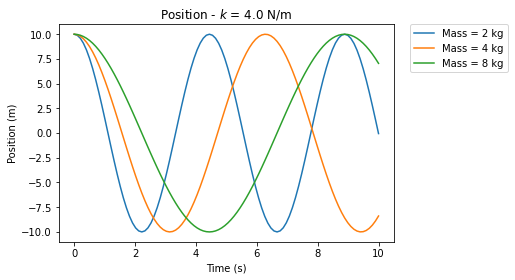

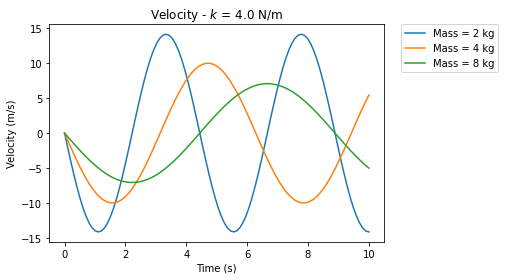

In [5]:
#Now plot the position and velocity as functions of time. 
#The way I'm doing it here plots the two in separate figures
figx, axx = plt.subplots()    #Create a new figure object and its associated axes
axx.plot(time, position_x2, label='Mass = 2 kg')   #Plot position versus t
axx.plot(time, position_x4, label='Mass = 4 kg')   #Plot position versus t
axx.plot(time, position_x8, label='Mass = 8 kg')   #Plot position versus t
axx.set_xlabel('Time (s)')    #Label the x-axis
axx.set_ylabel('Position (m)')  #Label the y-axis
axx.set_title(r'Position - $k$ = 4.0 N/m') #Title the plot
axx.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


#Repeat this for the velocity plot
figv, axv = plt.subplots()    
axv.plot(time, velocity_x2, label='Mass = 2 kg')   
axv.plot(time, velocity_x4, label='Mass = 4 kg')   
axv.plot(time, velocity_x8, label='Mass = 8 kg')   
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title(r'Velocity - $k$ = 4.0 N/m')
axv.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

As we can see in the above plots, for different masses, the amplitude of the oscillations of position *remains constant*. However, as mass increases, the period of the position oscillation *increases*. For velocity, as mass increases, the period of the oscillation *increases*. But as mass increases, the amplitude of the oscillation of velocity *decreases*.

### **Problem 2**
Plot the kinetic energy, potential energy, and total energy of the analytical solution. Pick any $m$, $k$ and $x_0$ you'd like! Be sure to show several oscillations in your plot.

* Describe what happens to the kinetic, potential and total energies as a function of time.

First we'll define some functions for potential energy, kinetic energy, and total energy

In [6]:
def potential_energy(k, x):
    '''
    Returns potential energy V as a function of spring
    constant k and position x
    '''
    V = (1 / 2) * k * x ** 2
    return V

In [7]:
def kinetic_energy(m, v_x):
    '''
    Returns kinetic energy K as a function of mass
    m and velocity v_x
    '''
    K = (1 / 2) * m * v_x ** 2
    return K

In [8]:
def total_energy(k, x, m, v_x):
    '''
    Returns total energy E as a function of 
    spring constant k, position x, mass m, and
    velocity v_x
    '''
    E = potential_energy(k, x) + kinetic_energy(m, v_x)
    return E

In [9]:
# Generate Input Parameters
k = 4.0                               # Spring constant (N/m)
x_0 = 10.0                            # Initial position (m)
mass = 8.0                            # (kg)
t_0 = 0                               # Initial time (s)
t_fin = 10                            # Final time (s)
time = np.linspace(0, 10, 100)        # Numpy array of times (s)

# Compute omega_0
omega_0 = omega(k, mass)

# Compute analytical solution for x(t) and v_x(t)
(position_x8, velocity_x8) = SHO_analytic(omega_0, x_0, time)

# Find Potential Energy, Kinetic Energy, and Energy
potential_e8 = potential_energy(k, position_x8)
kinetic_e8 = kinetic_energy(mass, velocity_x8)
total_e8 = total_energy(k, position_x8, mass, velocity_x8)

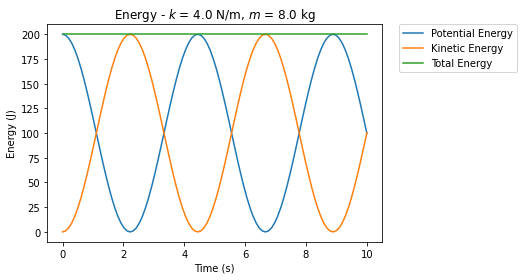

In [10]:
#Now plot the potential energy, kinetic energy, and
#total energy as functions of time. 
#The way I'm doing it here plots the three in separate figures
fig, ax = plt.subplots()    #Create a new figure object and its associated axes
ax.plot(time, potential_e8, label='Potential Energy')   #Plot poential E versus t
ax.plot(time, kinetic_e8, label='Kinetic Energy')   #Plot kinetic E versus t
ax.plot(time, total_e8, label='Total Energy')   #Plot Total E versus t
ax.set_xlabel('Time (s)')    #Label the x-axis
ax.set_ylabel('Energy (J)')  #Label the y-axis
ax.set_title(r'Energy - $k$ = 4.0 N/m, $m$ = 8.0 kg') #Title the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

As shown in the above plot, over time, total energy remains constant at 200 J. Potential energy $V$ and kinetic energy $K$ oscillation in a way so that as $V$ increases $K$ decreases and vice versa. Additionally, this increase and decrease occurs at the same rate for both $V$ and $K$.

### **Problem 3**
* Plot the phase space oribits for $m= 8.0~\text{kg}$, $k=4.0~\text{N/m}$ and three different intial positions $x_0 \in \{2.0~\text{m}, 4.0~\text{m}, 8.0~\text{m}\}$ all on one plot.
  * Describe how the phase space plots vary with $x_0$.

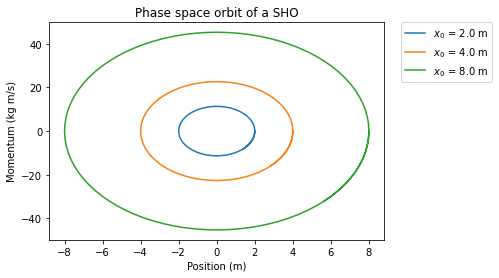

In [11]:
# Generate Input Parameters
k = 4.0                               # Spring constant (N/m)
x_0 = np.array([2.0, 4.0, 8.0])       # Initial position (m)
mass = 8                              # (kg)
t_0 = 0                               # Initial time (s)
t_fin = 10                            # Final time (s)
time = np.linspace(0, t_fin, 100)        # Numpy array of times (s)

# Compute omega_0
omega_0 = omega(k, mass)

# Compute analytical solution for x(t) and v_x(t)
(position_x0_2, velocity_x0_2) = SHO_analytic(omega_0, x_0[0], time)
(position_x0_4, velocity_x0_4) = SHO_analytic(omega_0, x_0[1], time)
(position_x0_8, velocity_x0_8) = SHO_analytic(omega_0, x_0[2], time)

# Compute the momentum
momentum_x0_2 = mass * velocity_x0_2
momentum_x0_4 = mass * velocity_x0_4
momentum_x0_8 = mass * velocity_x0_8

# Make Phase space plot for 3 different x_0 values
plt.plot(position_x0_2, momentum_x0_2, label=r'$x_0$ = 2.0 m')
plt.plot(position_x0_4, momentum_x0_4, label=r'$x_0$ = 4.0 m')
plt.plot(position_x0_8, momentum_x0_8, label=r'$x_0$ = 8.0 m')
plt.xlabel('Position (m)' )
plt.ylabel(r'Momentum (kg m/s)' )
plt.title( 'Phase space orbit of a SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

As we can see in the above plot, as the inital position $x_0$ increases, the variation in position and the variation in momentum for a simple harmonic oscillator increases. In other words, for a larger $x_0$, position can take a greater range of values and momentum can take a greater range as well.

* Plot the phase space oribits for $m= 8.0~\text{kg}$, $k=2.0~\text{N/m}$ $x_0=8.0~\text{m}$ and three different intial spring constants: $k \in \{2.0~\text{N/m}, 4.0~\text{N/m}, 8.0~\text{N/m}\}$ all on one plot
  * Describe how the phase space plots vary with $k$.



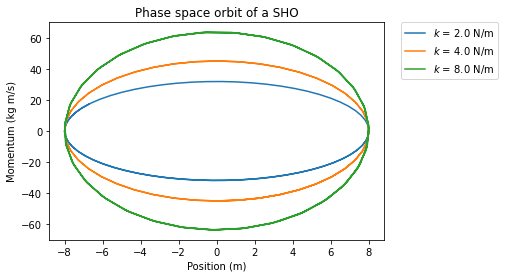

In [12]:
# Generate Input Parameters
k = np.array([2.0, 4.0, 8.0])         # Spring constant (N/m)
x_0 = 8.0                             # Initial position (m)
mass = 8.0                            # (kg)
t_0 = 0                               # Initial time (s)
t_fin = 20                            # Final time (s)
time = np.linspace(0, t_fin, 100)        # Numpy array of times (s)

# Compute omega_0
omega_0 = omega(k, mass)

# Compute analytical solution for x(t) and v_x(t)
(position_x0_2, velocity_x0_2) = SHO_analytic(omega_0[0], x_0, time)
(position_x0_4, velocity_x0_4) = SHO_analytic(omega_0[1], x_0, time)
(position_x0_8, velocity_x0_8) = SHO_analytic(omega_0[2], x_0, time)

# Compute the momentum
momentum_x0_2 = mass * velocity_x0_2
momentum_x0_4 = mass * velocity_x0_4
momentum_x0_8 = mass * velocity_x0_8

# Make Phase space plot for 3 different x_0 values
plt.plot(position_x0_2, momentum_x0_2, label=r'$k$ = 2.0 N/m')
plt.plot(position_x0_4, momentum_x0_4, label=r'$k$ = 4.0 N/m')
plt.plot(position_x0_8, momentum_x0_8, label=r'$k$ = 8.0 N/m')
plt.xlabel('Position (m)' )
plt.ylabel(r'Momentum (kg m/s)' )
plt.title( 'Phase space orbit of a SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In the above plot, we can see that as we vary the spring constant $k$, the range of positions $x_0$ that a simple harmonic oscilllator can take on does not change. The range extends from $x_0 \approx$ -8 m to $x_0 \approx$ 8 m for all values of $k$. On the contrary, as we increase $k$ values of momentum $p_x$ can take on a larger range. Specifically, this range can be from $p_x \approx$ -60 kg m/s to $p_x \approx$ 60 kg m/s for $k$ = 8.0 N/m, but it is only from $p_x \approx$ -35 kg m/s to $p_x \approx$ 35 kg m/s for $k$ = 2.0 N/m.

* How do you think your the shape of your phase space orbits would change if you gave the mass an intial kick, rather than starting it from rest?

If I gave the mass an initial kick, rather than starting it from rest, the range of positions that the SHO can take on would be larger, and the range of momentums would also be larger. This occurs because the SHO begins by carrying some momentum already, which would allow the momentum to increase even more, and the SHO will be able to travel further away (position increases more).

### **Problem 4**
Implement the Euler-Cromer Method to find $x(t)$ and $v_x(t)$ for the SHO.
* Plot analytical & Euler-Cromer for $\omega_0 = 2.0~\text{s}^{-1}$, $x_0=1.0~\text{m}$, $dt = 0.05~\text{s}$.

In [13]:
# Euler's algorithm applied to the simple harmonic oscillator
def SHO_Euler_Cromer( omega_0, x_0, t_max, dt):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, x, v)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    x0 - initial position (m) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the position & velocity arrays
    t_arr = np.zeros(t_steps)
    x_arr = np.zeros(t_steps)
    vx_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    x_arr[0] = x_0    # Initial position
    vx_arr[0] = 0.0   # Assume the mass is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        a = (-1.0) * (omega_0 ** 2.0) * x_arr[i]  # compute the accleration
        vx_arr[i + 1] = vx_arr[i] + a * dt        # update the velocity
        x_arr[i + 1] = x_arr[i] + vx_arr[i + 1] * dt  # update the position
    
    return (t_arr, x_arr, vx_arr)

In [14]:
# Compute a SHO trajectory using Euler-Cromer's algorithm

# Parameters
OMEGA_0 = 2.0     # angular frequncy [1/s]
X_0 = 1.0         # initial position [m]
T_max = 5.0       # maximum time [s]
DT = 0.05         # Euler time step [s]

# Compute the Euler-Cromer soltution
(t_euler_cromer, x_euler_cromer, vx_euler_cromer) = SHO_Euler_Cromer( OMEGA_0, X_0, T_max, DT)

# Compute the analyticial solution
t_analytic = np.copy(t_euler_cromer)  # We'll use the same times as Euler-Cromer
(x_analytic, vx_analytic) = SHO_analytic( OMEGA_0, X_0, t_analytic)

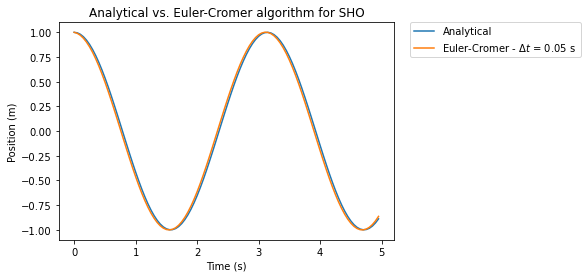

In [15]:
# Plot the analytical and Euler trajectories for the SHO 
plt.plot( t_analytic, x_analytic , label='Analytical')
plt.plot( t_euler_cromer, x_euler_cromer , label=r'Euler-Cromer - $\Delta t$ = 0.05 s')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title( 'Analytical vs. Euler-Cromer algorithm for SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

* Plot the error in $x(t)$ from Euler-Cromer as compared to the analytical solution several values of $dt$.

In [16]:
# Generate data for different values of dt

# Timesteps for Euler-Cromer method (s)
DT1 = 0.05
DT2 = 0.5
DT3 = 0.1
DT4 = 0.2
DT5 = 1

# Compute the Euler-Cromer soltution
(t_euler_cromer1, x_euler_cromer1, vx_euler_cromer1) = SHO_Euler_Cromer( OMEGA_0, X_0, T_max, DT1)
(t_euler_cromer2, x_euler_cromer2, vx_euler_cromer2) = SHO_Euler_Cromer( OMEGA_0, X_0, T_max, DT2)
(t_euler_cromer3, x_euler_cromer3, vx_euler_cromer3) = SHO_Euler_Cromer( OMEGA_0, X_0, T_max, DT3)
(t_euler_cromer4, x_euler_cromer4, vx_euler_cromer4) = SHO_Euler_Cromer( OMEGA_0, X_0, T_max, DT4)
(t_euler_cromer5, x_euler_cromer5, vx_euler_cromer5) = SHO_Euler_Cromer( OMEGA_0, X_0, T_max, DT5)

# Compute the analyticial solution
t_analytic1 = np.copy(t_euler_cromer1)  
(x_analytic1, vx_analytic1) = SHO_analytic( OMEGA_0, X_0, t_analytic1)
t_analytic2 = np.copy(t_euler_cromer2)  
(x_analytic2, vx_analytic2) = SHO_analytic( OMEGA_0, X_0, t_analytic2)
t_analytic3 = np.copy(t_euler_cromer3)  
(x_analytic3, vx_analytic3) = SHO_analytic( OMEGA_0, X_0, t_analytic3)
t_analytic4 = np.copy(t_euler_cromer4)  
(x_analytic4, vx_analytic4) = SHO_analytic( OMEGA_0, X_0, t_analytic4)
t_analytic5 = np.copy(t_euler_cromer5)
(x_analytic5, vx_analytic5) = SHO_analytic( OMEGA_0, X_0, t_analytic5)



In [17]:
# DOnt use absolute value in computing error - this is a bit more descriptive

error1 = (x_euler_cromer1 - x_analytic1)
error2 = (x_euler_cromer2 - x_analytic2)
error3 = (x_euler_cromer3 - x_analytic3)
error4 = (x_euler_cromer4 - x_analytic4)
error5 = (x_euler_cromer5 - x_analytic5)

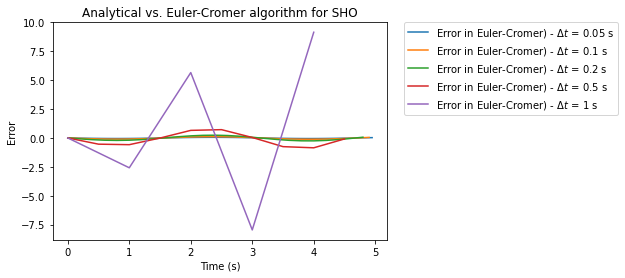

In [18]:
# Plot the error in Euler 
plt.plot( t_euler_cromer1, error1 , label=r'Error in Euler-Cromer) - $\Delta t$ = 0.05 s')
plt.plot( t_euler_cromer3, error3 , label=r'Error in Euler-Cromer) - $\Delta t$ = 0.1 s')
plt.plot( t_euler_cromer4, error4 , label=r'Error in Euler-Cromer) - $\Delta t$ = 0.2 s')
plt.plot( t_euler_cromer2, error2 , label=r'Error in Euler-Cromer) - $\Delta t$ = 0.5 s')
plt.plot( t_euler_cromer5, error5 , label=r'Error in Euler-Cromer) - $\Delta t$ = 1 s')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title( 'Analytical vs. Euler-Cromer algorithm for SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

We can see that the larger the timestep $\Delta t$ is, the larger the error in $x(t)$ from the Euler-Cromer method, as we should expect.

### **Problem 5**
Consider the anaylitical solution for the damped osciallator for $\beta < \omega_0$. Plot $x(t)$ vs. $t$ for four different values:
$$\beta \in\{ 0.01\omega_0, 0.1\omega_0, 0.5\omega_0, 0.9\omega_0\}$$ with a single value of $x_0$ and $\omega_0$ of your choosing.

In [19]:
def damping_rate(b, mass):
    '''
    Returns damping rate beta as a function
    of parameters damping constant b (N s/m)
    and mass m (kg)
    '''
    beta = b / (2 * m)
    return beta

In [20]:
def damped_frequency(omega_0, beta):
    '''
    Returns Damped frequency omega_1 as a 
    function of angular frequency omega_0
    and damping rate beta
    '''
    omega_1 = np.sqrt(omega_0 ** 2 - beta ** 2)
    return omega_1

In [21]:
# Analytical solution to the SHO
def SHO_analytic_damped(x_0, beta, omega_1, t):
    '''
    Returns the analytical solution for the position 
    of a simple harmonic released from rest with damping.

    Returns: (x)

    Parameters:
    omega_1 - the damped frequency - float
    x0 - initial position [m] - float
    t - time [s] - float or NumPy array
    beta - the damping rate
    '''
    # position as a funciton of time
    x = x_0 * np.exp(-beta * t) * np.cos(omega_1 * t) 
    
    return x

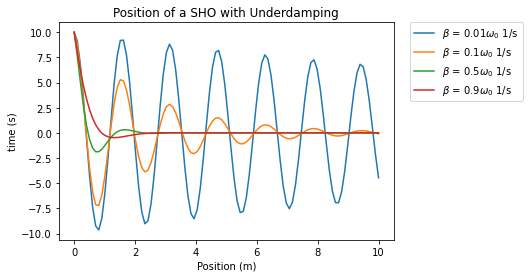

In [22]:
# Generate Input Parameters
omega_0 = 4.0                         # Angular Frequency (1/s)
x_0 = 10.0                            # Initial position (m)
t_0 = 0                               # Initial time (s)
t_fin = 10                            # Final time (s)
time = np.linspace(0, 10, 100)        # Numpy array of times (s)

# Get values for beta
beta = np.array([0.01 * omega_0, 0.1 * omega_0, 0.5 * omega_0, 0.9 * omega_0])

omega_1_01 = damped_frequency(omega_0, beta[0])
omega_1_1 = damped_frequency(omega_0, beta[1])
omega_1_5 = damped_frequency(omega_0, beta[2])
omega_1_9 = damped_frequency(omega_0, beta[3])


# Compute analytical solution for x(t)
position_x01 = SHO_analytic_damped(x_0, beta[0], omega_1_01, time)
position_x1 = SHO_analytic_damped(x_0, beta[1], omega_1_1, time)
position_x5 = SHO_analytic_damped(x_0, beta[2], omega_1_5, time)
position_x9 = SHO_analytic_damped(x_0, beta[2], omega_1_9, time)

# Plot x(t) vs t for different beta values
plt.plot(time, position_x01, label=r'$\beta$ = 0.01$\omega_0$ 1/s')
plt.plot(time, position_x1, label=r'$\beta$ = 0.1$\omega_0$ 1/s')
plt.plot(time, position_x5, label=r'$\beta$ = 0.5$\omega_0$ 1/s')
plt.plot(time, position_x9, label=r'$\beta$ = 0.9$\omega_0$ 1/s')
plt.xlabel('Position (m)' )
plt.ylabel(r'time (s)' )
plt.title( 'Position of a SHO with Underdamping')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

As we see in the above plot, larger values of $\beta$ cause the SHO to stop oscillating more quickly.

### **Problem 6**
Implement the Euler-Cromer method for the damped harmonic oscillator. 


* Plot $x(t)$ vs. $t$ for both the analytical and Euler-Cromer solution for $\beta = 0.1 \omega_0$

In [23]:
# Euler's algorithm applied to the simple harmonic oscillator
def SHO_Euler_Cromer_Damp( omega_0, x_0, t_max, dt, beta):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, x, v)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    x0 - initial position (m) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    beta - damping rate (1/s)
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the position & velocity arrays
    t_arr = np.zeros(t_steps)
    x_arr = np.zeros(t_steps)
    vx_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    x_arr[0] = x_0    # Initial position
    vx_arr[0] = 0.0   # Assume the mass is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        a = (-1.0) * ((omega_0 ** 2.0) * x_arr[i] + 2 * beta * vx_arr[i])  # compute the accleration
        vx_arr[i + 1] = vx_arr[i] + a * dt        # update the velocity
        x_arr[i + 1] = x_arr[i] + vx_arr[i + 1] * dt  # update the position
    
    return (t_arr, x_arr, vx_arr)

In [24]:
# Compute a SHO trajectory using Euler-Cromer's algorithm with damping

# Parameters
OMEGA_0 = 4.0           # angular frequncy [1/s]
X_0 = 10.0              # initial position [m]
T_max = 5.0             # maximum time [s]
DT = 0.05               # Euler time step [s]
BETA = 0.1 * OMEGA_0    # Damping rate

# Compute omega_1
omega_1 = damped_frequency(OMEGA_0, BETA)

# Compute the Euler-Cromer soltution
(t_euler_cromer, x_euler_cromer, vx_euler_cromer) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA)

# Compute the analyticial solution
t_analytic = np.copy(t_euler_cromer)  # We'll use the same times as Euler-Cromer
x_analytic = SHO_analytic_damped(X_0, BETA, omega_1, t_analytic)

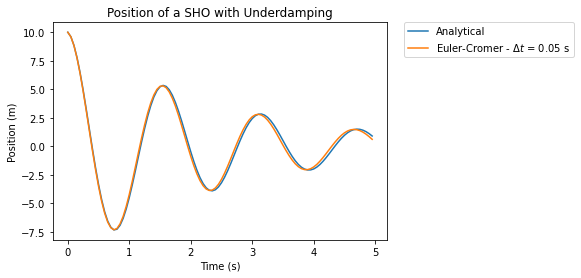

In [25]:
# Plot x(t) vs t for analytical and Euler-cromer solution
plt.plot(t_analytic, x_analytic, label='Analytical')
plt.plot(t_euler_cromer, x_euler_cromer, label=r'Euler-Cromer - $\Delta t$ = 0.05 s')
plt.xlabel('Time (s)' )
plt.ylabel(r'Position (m)' )
plt.title( 'Position of a SHO with Underdamping')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

* On a separate plot, plot the error in your numerical solution as compared to the analytical solution: 
$$ \delta x(t) = x_{numerical}(t)-x_{analytical}(t) $$

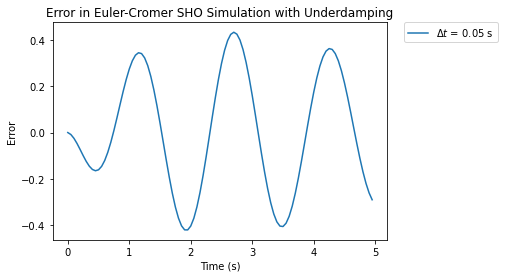

In [26]:
error = x_euler_cromer - x_analytic

plt.plot(t_euler_cromer, error,label=r'$\Delta t$ = 0.05 s')
plt.xlabel('Time (s)' )
plt.ylabel(r'Error' )
plt.title( 'Error in Euler-Cromer SHO Simulation with Underdamping')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### **Problem 7**
Use Euler-Cromer to find the $x(t)$ and $v(t)$ for $\beta \in \{ 0.01\omega_0,~0.1\omega_0,~\omega_0,~2\omega_0,~4\omega_0\}$. For each $\beta$ value:
* Plot $x(t)$
* Plot the total energy
* Plot the phase space orbits

Describe the behavior you see in each of your plots for each $\beta$ value.

In [27]:
# Compute a SHO trajectory using Euler-Cromer's algorithm with damping
# We define omega_0, x_0, Mass

# Parameters
OMEGA_0 = 4.0           # angular frequncy [1/s]
X_0 = 10.0              # initial position [m]
T_max = 10             # maximum time [s]
DT = 0.05               # Euler time step [s]
BETA = np.array([0.01 * OMEGA_0, 0.1 * OMEGA_0, OMEGA_0, 2 * OMEGA_0, 4 * OMEGA_0])    # Damping rate
MASS = 8                # kg

K = (OMEGA_0 ** 2) * MASS

# Compute the Euler-Cromer soltution
(t_euler_cromer1, x_euler_cromer1, vx_euler_cromer1) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[0])
(t_euler_cromer2, x_euler_cromer2, vx_euler_cromer2) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[1])
(t_euler_cromer3, x_euler_cromer3, vx_euler_cromer3) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[2])
(t_euler_cromer4, x_euler_cromer4, vx_euler_cromer4) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[3])
(t_euler_cromer5, x_euler_cromer5, vx_euler_cromer5) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[4])


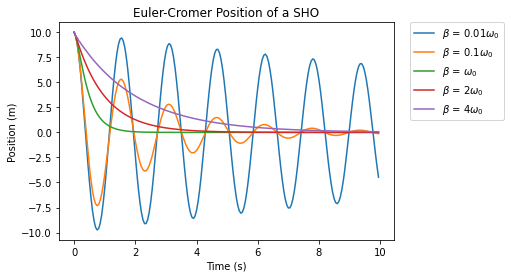

In [28]:
# Plot x(t) vs t for Euler-cromer solution for different values of beta
plt.plot(t_euler_cromer1, x_euler_cromer1, label=r'$\beta$ = 0.01$\omega_0$')
plt.plot(t_euler_cromer2, x_euler_cromer2, label=r'$\beta$ = 0.1$\omega_0$')
plt.plot(t_euler_cromer3, x_euler_cromer3, label=r'$\beta$ = $\omega_0$')
plt.plot(t_euler_cromer4, x_euler_cromer4, label=r'$\beta$ = 2$\omega_0$')
plt.plot(t_euler_cromer5, x_euler_cromer5, label=r'$\beta$ = 4$\omega_0$')
plt.xlabel('Time (s)' )
plt.ylabel(r'Position (m)' )
plt.title( 'Euler-Cromer Position of a SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Here, we can see that the SHO only has an oscillatory nature if $\beta < \omega_0$. When $\beta \geq \omega_0$, the "SHO" does not oscillate, and simply returns to $x_0$ = 0 m.

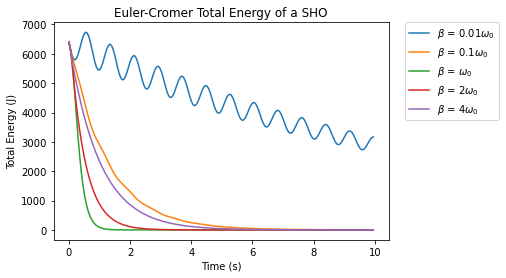

In [29]:
# Plot Total Energy vs t for Euler-cromer solution for different values of beta

# First get data
total_energy1 = (0.5) * K * (x_euler_cromer1 ** 2) + (0.5) * MASS * (vx_euler_cromer1 ** 2)
total_energy2 = (0.5) * K * (x_euler_cromer2 ** 2) + (0.5) * MASS * (vx_euler_cromer2 ** 2)
total_energy3 = (0.5) * K * (x_euler_cromer3 ** 2) + (0.5) * MASS * (vx_euler_cromer3 ** 2)
total_energy4 = (0.5) * K * (x_euler_cromer4 ** 2) + (0.5) * MASS * (vx_euler_cromer4 ** 2)
total_energy5 = (0.5) * K * (x_euler_cromer5 ** 2) + (0.5) * MASS * (vx_euler_cromer5 ** 2)

# Then plot it
# Plot total energy vs t for Euler-cromer solution for different values of beta
plt.plot(t_euler_cromer1, total_energy1, label=r'$\beta$ = 0.01$\omega_0$')
plt.plot(t_euler_cromer2, total_energy2, label=r'$\beta$ = 0.1$\omega_0$')
plt.plot(t_euler_cromer3, total_energy3, label=r'$\beta$ = $\omega_0$')
plt.plot(t_euler_cromer4, total_energy4, label=r'$\beta$ = 2$\omega_0$')
plt.plot(t_euler_cromer5, total_energy5, label=r'$\beta$ = 4$\omega_0$')
plt.xlabel('Time (s)' )
plt.ylabel(r'Total Energy (J)' )
plt.title( 'Euler-Cromer Total Energy of a SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

The larger $\beta$ is, the quicker the total energy decreases. For each value of $\beta$, the total energy appears to have an oscillatory nature, though it is most pronounced when $\beta$ is smallest.

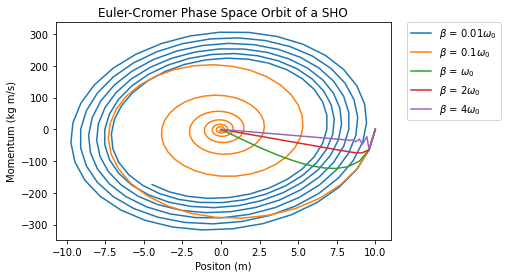

In [30]:
# Plot phase space orbits for Euler-cromer solution for different values of beta

# first calculate momentum
momentum_euler_cromer1 = MASS * vx_euler_cromer1
momentum_euler_cromer2 = MASS * vx_euler_cromer2
momentum_euler_cromer3 = MASS * vx_euler_cromer3
momentum_euler_cromer4 = MASS * vx_euler_cromer4
momentum_euler_cromer5 = MASS * vx_euler_cromer5

# Now plot
# Plot momentum vs position for Euler-cromer solution for different values of beta
plt.plot(x_euler_cromer1, momentum_euler_cromer1, label=r'$\beta$ = 0.01$\omega_0$')
plt.plot(x_euler_cromer2, momentum_euler_cromer2, label=r'$\beta$ = 0.1$\omega_0$')
plt.plot(x_euler_cromer3, momentum_euler_cromer3, label=r'$\beta$ = $\omega_0$')
plt.plot(x_euler_cromer4, momentum_euler_cromer4, label=r'$\beta$ = 2$\omega_0$')
plt.plot(x_euler_cromer5, momentum_euler_cromer5, label=r'$\beta$ = 4$\omega_0$')
plt.xlabel('Positon (m)' )
plt.ylabel(r'Momentum (kg m/s)' )
plt.title( 'Euler-Cromer Phase Space Orbit of a SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

For each value of $\beta$, the momentum and position both approach zero as time progresses. However, the phase space orbit takes a spiral nature when $\beta < \omega_0$ and it goes directly to $x_0$ = 0 m and $p_x$ = 0 kg m/s when $\beta \geq \omega_0$.

* $\beta = \omega_0$ is known as *critical damping*--what is special about a critically damped system? How does this to compare to the *overdamped* regime: $\beta > \omega_0$?

When $\beta = \omega_0$, the position, velocity, and total energy go to zero very quicly, and they do so faster than in overdamping when $\beta > \omega_0$. I believe that critical damping causes the position, velocity, and total energy to reach zero fastest.

### **Problem 8**
* Use Euler-Cromer to compute $x(t)$ for the following $\beta$ values in the overdamped regime: $\beta \in \{ 1.1\omega_0, 2.0\omega_0,~4.0\omega_0,~8.0\omega_0\}$. 

In [31]:
# Compute a SHO trajectory using Euler-Cromer's algorithm with damping
# We define omega_0, x_0, Mass


# Parameters
OMEGA_0 = 4.0           # angular frequncy [1/s]
X_0 = 10.0              # initial position [m]
T_max = 10            # maximum time [s]
DT = 0.05               # Euler time step [s]
BETA = np.array([1.1 * OMEGA_0, 2.0 * OMEGA_0, 4.0 * OMEGA_0, 8.0 * OMEGA_0])    # Damping rate
MASS = 8                # kg

K = (OMEGA_0 ** 2) * MASS

# Compute the Euler-Cromer soltution
(t_euler_cromer1, x_euler_cromer1, vx_euler_cromer1) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[0])
(t_euler_cromer2, x_euler_cromer2, vx_euler_cromer2) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[1])
(t_euler_cromer3, x_euler_cromer3, vx_euler_cromer3) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[2])
(t_euler_cromer4, x_euler_cromer4, vx_euler_cromer4) = SHO_Euler_Cromer_Damp( OMEGA_0, X_0, T_max, DT, BETA[3])

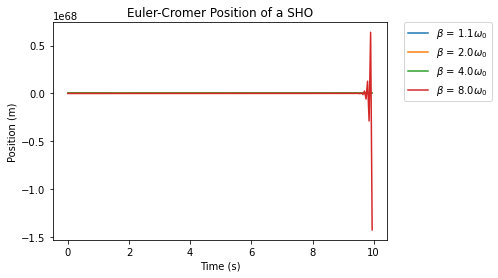

In [32]:

# Now we will plot x(t)

# Plot x(t) vs t for Euler-cromer solution for different values of beta
plt.plot(t_euler_cromer1, x_euler_cromer1, label=r'$\beta$ = 1.1$\omega_0$')
plt.plot(t_euler_cromer2, x_euler_cromer2, label=r'$\beta$ = 2.0$\omega_0$')
plt.plot(t_euler_cromer3, x_euler_cromer3, label=r'$\beta$ = 4.0$\omega_0$')
plt.plot(t_euler_cromer4, x_euler_cromer4, label=r'$\beta$ = 8.0$\omega_0$')
plt.xlabel('Time (s)' )
plt.ylabel(r'Position (m)' )
plt.title( 'Euler-Cromer Position of a SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

This plot looked a bit odd, considering that $x_0$ = 10.0 m, and I'm not totally sure why.

I used this link to help with the following code:

https://thispointer.com/find-the-index-of-a-value-in-numpy-array/

In [33]:
# We must find the time where displacement is 1/e of initial displacement x_0 = 10 m.

# We'll find the first time where x(t) is less than the folding displacement, and that will
# Be the index for our estimate.

# Compute folding displacement
folding_displacement = X_0 * (1 / np.exp(1))

# For beta = 1.1 omega_0
for item in x_euler_cromer1:                            # Loop through x(t)
    if item < folding_displacement:                     # See which x(t) is less than folding displacement
        index = np.where(x_euler_cromer1 == item)       # Get the index
        tau1 = t_euler_cromer1[index]
        print(tau1)                                     # Print the folding time
        break
        
# For beta = 2.0 omega_0
for item in x_euler_cromer2:
    if item < folding_displacement:
        index = np.where(x_euler_cromer2 == item)
        tau2 = t_euler_cromer2[index]
        print(tau2)
        break
        
# For beta = 4.0 omega_0
for item in x_euler_cromer3:
    if item < folding_displacement:
        index = np.where(x_euler_cromer3 == item)
        tau3 = t_euler_cromer3[index]
        print(tau3)
        break
        
# For beta = 8.0 omega_0
for item in x_euler_cromer4:
    if item < folding_displacement:
        index = np.where(x_euler_cromer4 == item)
        tau4 = t_euler_cromer4[index]
        print(tau4)
        break
        
taus = np.array([tau1, tau2, tau3, tau4])

[0.55]
[1.]
[2.]
[0.35]


* Plot $\tau$ as a funtion of $\beta$ for these values of $\beta$.

I used this link for some help with my plot:
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

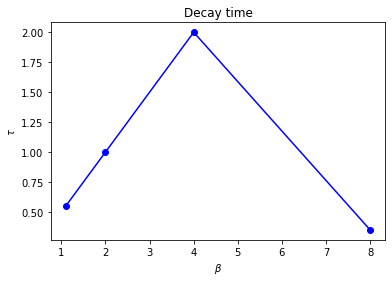

In [34]:
betas = np.array([1.1, 2.0, 4.0, 8.0])

# plot tau as a function of beta

plt.plot(betas, taus, 'b', marker = 'o')
plt.xlabel(r'$\beta$' )
plt.ylabel(r'$\tau$' )
plt.title( 'Decay time')
plt.show()

### ***Extension Problem 10***
Implement the Euler-Cromer Method for the driven damped harmonic oscillator. 

In [35]:
# Euler's algorithm applied to the driven simple harmonic oscillator
def SHO_Euler_Cromer_Driven_Damp( omega_0, x_0, t_max, dt, beta, omega_d, f_0):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, x, v)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    x0 - initial position (m) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    beta - damping rate (1/s)
    omega_d - frequency of driving
    f_0 - amplitude fo driving force
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the position & velocity arrays
    t_arr = np.zeros(t_steps)
    x_arr = np.zeros(t_steps)
    vx_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    x_arr[0] = x_0    # Initial position
    vx_arr[0] = 0.0   # Assume the mass is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        
        # compute the accleration
        a = (-1.0) * ((omega_0 ** 2.0) * x_arr[i] + 2 * beta * vx_arr[i]) + f_0 * np.cos(omega_d * t_arr[i])  
        vx_arr[i + 1] = vx_arr[i] + a * dt        # update the velocity
        x_arr[i + 1] = x_arr[i] + vx_arr[i + 1] * dt  # update the position
    
    return (t_arr, x_arr, vx_arr)

* Compute the trajectory of the oscillator for 
  * $\beta = 0.1 \omega_0$
  * $f_0 = x_0 \omega_0^2 $ 
  * $\omega_d =\{0.1 \omega_0, 0.5 \omega_0, \omega_0, 2.0 \omega_0 \}$ 

In [36]:
# Compute a SHO trajectory using Euler-Cromer's algorithm with damping and driving
# We define omega_0, x_0, mass, 

# Parameters
OMEGA_0 = 4.0           # angular frequncy [1/s]
X_0 = 10.0              # initial position [m]
T_max = 10             # maximum time [s]
DT = 0.05               # Euler time step [s]
MASS = 8                # kg

# Omega_D values of interest
OMEGA_D = np.array([0.1 * OMEGA_0, 0.5 * OMEGA_0, OMEGA_0, 2.0 * OMEGA_0])

# Calculations we make
BETA = 0.1 * OMEGA_0       #damping rate [1/s]
F_0 = X_0 * OMEGA_0 ** 2   # Amplitude for driving force
K = (OMEGA_0 ** 2) * MASS  # spring constant k [N/m]


# Compute the Euler-Cromer soltution
(t_euler_cromer1, x_euler_cromer1, vx_euler_cromer1) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[0], F_0)
(t_euler_cromer2, x_euler_cromer2, vx_euler_cromer2) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[1], F_0)
(t_euler_cromer3, x_euler_cromer3, vx_euler_cromer3) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[2], F_0)
(t_euler_cromer4, x_euler_cromer4, vx_euler_cromer4) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[3], F_0)


* Make three plots:
  1. Position vs. time
  2. Energy vs. time
  3. Phase space orbits

  Include all 4 values of $\omega_d$ on each plot. 

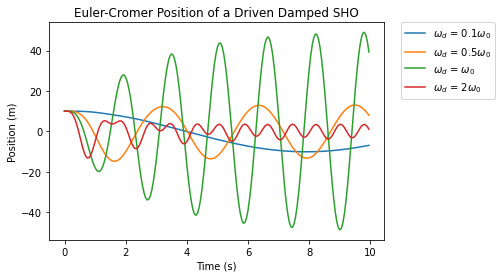

In [37]:
# 1. Plot of position vs. time for different values of Omega_D

plt.plot(t_euler_cromer1, x_euler_cromer1, label=r'$\omega_d$ = 0.1$\omega_0$')
plt.plot(t_euler_cromer2, x_euler_cromer2, label=r'$\omega_d$ = 0.5$\omega_0$')
plt.plot(t_euler_cromer3, x_euler_cromer3, label=r'$\omega_d$ = $\omega_0$')
plt.plot(t_euler_cromer4, x_euler_cromer4, label=r'$\omega_d$ = 2$\omega_0$')
plt.xlabel('Time (s)' )
plt.ylabel(r'Position (m)' )
plt.title( 'Euler-Cromer Position of a Driven Damped SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In the above plot, we can see that the range of positions that the SHO can take on when $\omega_d = \omega_0$ is largest. When $\omega_d > \omega_0$, the position seems to reach its maximum extent, return slightly towards $x_0$ = 0, but then go back again towards its maximum extent. When $\omega_d < \omega_0$, the SHO oscillates, though the range of positions that it takes on increases over time. When $\omega_d << \omega_0$ (in the case of $\omega_d$ = 0.1$\omega_0$), the period of the SHO is very large.

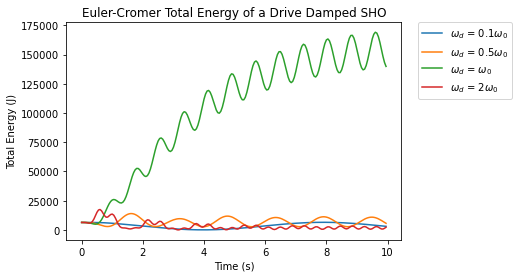

In [38]:
# 2. Plot Total Energy vs t for Euler-cromer solution for different values of Omega_D

# First get data
total_energy1 = (0.5) * K * (x_euler_cromer1 ** 2) + (0.5) * MASS * (vx_euler_cromer1 ** 2)
total_energy2 = (0.5) * K * (x_euler_cromer2 ** 2) + (0.5) * MASS * (vx_euler_cromer2 ** 2)
total_energy3 = (0.5) * K * (x_euler_cromer3 ** 2) + (0.5) * MASS * (vx_euler_cromer3 ** 2)
total_energy4 = (0.5) * K * (x_euler_cromer4 ** 2) + (0.5) * MASS * (vx_euler_cromer4 ** 2)

# Then plot it
# Plot total energy vs t for Euler-cromer solution for different values of beta
plt.plot(t_euler_cromer1, total_energy1, label=r'$\omega_d$ = 0.1$\omega_0$')
plt.plot(t_euler_cromer2, total_energy2, label=r'$\omega_d$ = 0.5$\omega_0$')
plt.plot(t_euler_cromer3, total_energy3, label=r'$\omega_d$ = $\omega_0$')
plt.plot(t_euler_cromer4, total_energy4, label=r'$\omega_d$ = 2$\omega_0$')
plt.xlabel('Time (s)' )
plt.ylabel(r'Total Energy (J)' )
plt.title( 'Euler-Cromer Total Energy of a Drive Damped SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In the above plot, we can see that the total energy increases significantly over time when $\omega_d = \omega_0$. When $\omega_d > \omega_0$, total energy decreases over time, but it oscillates quite frequently with an irregular period and amplitude. When $\omega_d < \omega_0$, the total energy oscillates with a fairly regular period, though the range of total energies that get taken on varies over time. When $\omega_d << \omega_0$ (in the case of $\omega_d$ = 0.1$\omega_0$), the period of the total energy of the SHO is very large.

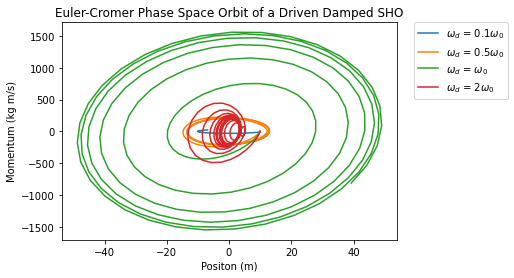

In [39]:
# Plot phase space orbits for driven damped Euler-cromer solution for different values of omega_d

# first calculate momentum
momentum_euler_cromer1 = MASS * vx_euler_cromer1
momentum_euler_cromer2 = MASS * vx_euler_cromer2
momentum_euler_cromer3 = MASS * vx_euler_cromer3
momentum_euler_cromer4 = MASS * vx_euler_cromer4

# Now plot
# Plot momentum vs position for Euler-cromer solution for different values of beta
plt.plot(x_euler_cromer1, momentum_euler_cromer1, label=r'$\omega_d$ = 0.1$\omega_0$')
plt.plot(x_euler_cromer2, momentum_euler_cromer2, label=r'$\omega_d$ = 0.5$\omega_0$')
plt.plot(x_euler_cromer3, momentum_euler_cromer3, label=r'$\omega_d$ = $\omega_0$')
plt.plot(x_euler_cromer4, momentum_euler_cromer4, label=r'$\omega_d$ = 2$\omega_0$')
plt.xlabel('Positon (m)' )
plt.ylabel(r'Momentum (kg m/s)' )
plt.title( 'Euler-Cromer Phase Space Orbit of a Driven Damped SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In the above plot, we can see that when $\omega_d = \omega_0$, the range of positions $x_0$ that the SHO can take on gets larger over time, as does the momentum $p_x$. When $\omega_d > \omega_0$ (red line), the oppositte is true, with both $x_0$ and $p_x$ becoming closer to zero over time. Interestingly, most positions that get take on are $x_0 <$ 0. When $\omega_d < \omega_0$, the position remains fairly close to $x_0 =$ 0 m, with the momentum not having a fairly large range of values.

* The *resonant frequency* of a damped oscillator is
$$\omega_r = \sqrt{\omega_0^2 - 2\beta^2} $$
Illustrate and describe the behavior of the oscillator as $\omega_d$ approaches $\omega_r$.

In [40]:
def resonant_freq(omega_0, beta):
    '''
    Returns resonant frequence omega_r of a damped oscillator
    given parameters omega_0 and beta.
    '''
    omega_r = np.sqrt(omega_0 ** 2 - 2 * (beta ** 2))
    return omega_r

In [41]:
# First lets find what omega_r is for our simulations, using
# the function we've defined above

OMEGA_R = resonant_freq(OMEGA_0, BETA)
print(OMEGA_R)

3.9597979746446663


In [42]:
# We see that omega_r is 3.9597979746446663, so lets choose omega_d values that
# approach 3.9597979746446663

# Define our array for Omega_d
OMEGA_D = np.array([0.5 * OMEGA_R, 0.7 * OMEGA_R, 0.9 * OMEGA_R, OMEGA_R, 1.1 * OMEGA_R, 1.3 * OMEGA_R, 1.5 * OMEGA_R])

# Compute the Euler-Cromer soltution
(t_euler_cromer1, x_euler_cromer1, vx_euler_cromer1) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[0], F_0)
(t_euler_cromer2, x_euler_cromer2, vx_euler_cromer2) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[1], F_0)
(t_euler_cromer3, x_euler_cromer3, vx_euler_cromer3) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[2], F_0)
(t_euler_cromer4, x_euler_cromer4, vx_euler_cromer4) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[3], F_0)
(t_euler_cromer5, x_euler_cromer5, vx_euler_cromer5) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[4], F_0)
(t_euler_cromer6, x_euler_cromer6, vx_euler_cromer6) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[5], F_0)
(t_euler_cromer7, x_euler_cromer7, vx_euler_cromer7) = SHO_Euler_Cromer_Driven_Damp( OMEGA_0, X_0, T_max, DT, BETA, OMEGA_D[6], F_0)

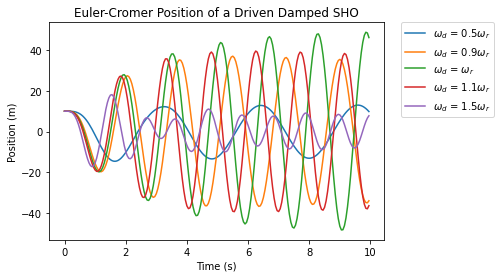

In [43]:
# Plot of position vs. time for different values of Omega_D

plt.plot(t_euler_cromer1, x_euler_cromer1, label=r'$\omega_d$ = 0.5$\omega_r$')
plt.plot(t_euler_cromer3, x_euler_cromer3, label=r'$\omega_d$ = 0.9$\omega_r$')
plt.plot(t_euler_cromer4, x_euler_cromer4, label=r'$\omega_d$ = $\omega_r$')
plt.plot(t_euler_cromer5, x_euler_cromer5, label=r'$\omega_d$ = 1.1$\omega_r$')
plt.plot(t_euler_cromer7, x_euler_cromer7, label=r'$\omega_d$ = 1.5$\omega_r$')
plt.xlabel('Time (s)' )
plt.ylabel(r'Position (m)' )
plt.title( 'Euler-Cromer Position of a Driven Damped SHO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

From the above plot, we can see that as $\omega_d$ approaches $\omega_r$, the amplitude gets larger over time more quickly, meaning the driving force has a more pronounced effect. And when $\omega_d = \omega_r$, we can see the largest increase in the amplitude of the position over a given period of time (the green line).

### ***Extension Problem 11***
Implement the Euler-Cromer algorithm for the simple pendulum. 

In [44]:
# omega_0 for simple pendulum
def omega_0_pend(L):
    '''
    Returns omega_0, the angular frequency, as a function of 
    length of pendulum L.
    
    Returns: 
    omega - angular frequency (1/s)
    Parameters:
    Length - L (m)
    '''
    g = 9.8    # m/s
    omega_0 = np.sqrt(g / L)
    return omega_0

In [45]:
# Euler's algorithm applied to the simple pendulum
def PEND_Euler_Cromer( omega_0, theta_0, t_max, dt):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, theta, angular speed)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    theta_0 - initial algle (radians) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the angle & velocity arrays
    t_arr = np.zeros(t_steps)
    theta_arr = np.zeros(t_steps)
    ang_speed_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    theta_arr[0] = theta_0    # Initial position
    ang_speed_arr[0] = 0.0   # Assume the pendulum is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        alpha = (-1.0) * (omega_0 ** 2.0) * np.sin(theta_arr[i])  # compute the angular accleration
        ang_speed_arr[i + 1] = ang_speed_arr[i] + alpha * dt        # update the angular velocity
        theta_arr[i + 1] = theta_arr[i] + ang_speed_arr[i + 1] * dt  # update the position
    
    return (t_arr, theta_arr, ang_speed_arr)

* Make three separte plots of $\theta(t)$ for the simple pendulum with $\theta_0 = \{(0.01)\pi, (0.1)\pi, \pi/4\}$. 

In [46]:
# Compute a pendulum trajectory using Euler-Cromer's algorithm
# we define length of pendulum

LENGTH = 1.0      # [m]
pi = np.pi       # for ease of writing code

# Parameters

OMEGA_0 = omega_0_pend(LENGTH)     # angular frequncy [1/s]
THETA_0 = np.array([0.01 * pi, 0.1 * pi, pi / 4])         # initial angle [rad]
T_max = 5.0       # maximum time [s]
DT = 0.05         # Euler time step [s]

# Compute the Euler-Cromer soltution
(t_euler_cromer1, theta_euler_cromer1, omega_euler_cromer1) = PEND_Euler_Cromer( OMEGA_0, THETA_0[0], T_max, DT)
(t_euler_cromer2, theta_euler_cromer2, omega_euler_cromer2) = PEND_Euler_Cromer( OMEGA_0, THETA_0[1], T_max, DT)
(t_euler_cromer3, theta_euler_cromer3, omega_euler_cromer3) = PEND_Euler_Cromer( OMEGA_0, THETA_0[2], T_max, DT)

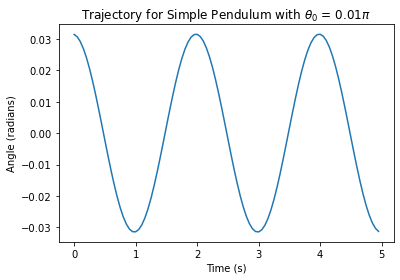

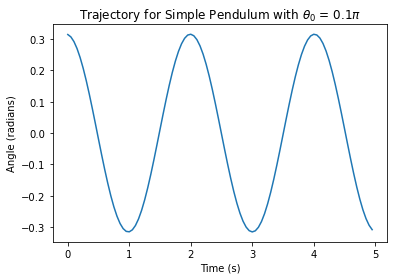

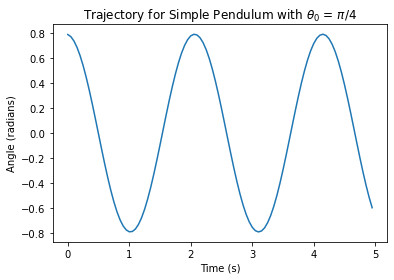

In [47]:
fig, ax1 = plt.subplots()    #Create a new figure object and its associated axes
ax1.plot(t_euler_cromer1, theta_euler_cromer1)
ax1.set_xlabel('Time (s)')                        #Label the horizontal axis
ax1.set_ylabel('Angle (radians)')                      #Label the vertical axis
ax1.set_title(r"Trajectory for Simple Pendulum with $\theta_0$ = 0.01$\pi$")#Title the plot 

fig, ax2 = plt.subplots()
ax2.plot(t_euler_cromer2, theta_euler_cromer2)
ax2.set_xlabel('Time (s)')                        #Label the horizontal axis
ax2.set_ylabel('Angle (radians)')                      #Label the vertical axis
ax2.set_title(r"Trajectory for Simple Pendulum with $\theta_0$ = 0.1$\pi$")#Title the plot 

fig, ax3 = plt.subplots()
ax3.plot(t_euler_cromer3, theta_euler_cromer3)
ax3.set_xlabel('Time (s)')                        #Label the horizontal axis
ax3.set_ylabel('Angle (radians)')                      #Label the vertical axis
ax3.set_title(r"Trajectory for Simple Pendulum with $\theta_0$ = $\pi$/4")#Title the plot 

plt.show()

* For each value of $\theta_0$, aslo plot $\theta(t)$ using the analytical expression under harmonic approximation for the corresponding $\theta_0$ value.

In [48]:
# Analytical solution to the Pendulum using harmonic approximation
def PEND_analytic( omega_0, theta_0, t):
    '''
    Returns the analytical solution for the angle and velocity 
    of a pendulum released from rest.

    Returns: (theta, ang_v)

    Parameters:
    omega_0 - frequency
    thet_0 - initial angle [rad] - float
    t - time [s] - float or NumPy array
    '''
    # angle as a funciton of time
    theta = theta_0 * np.cos( omega_0 * t )

    # angular velocity as a funciton of time                       
    ang_v = (-1.0) * omega_0 * theta_0 * np.sin( omega_0 * t )  
    
    return (theta, ang_v)

In [49]:
# Compute the analyticial solution
t_analytic1 = np.copy(t_euler_cromer1)  
(theta_analytic1, ang_v1) = PEND_analytic( OMEGA_0, THETA_0[0], t_analytic1)
t_analytic2 = np.copy(t_euler_cromer2)  
(theta_analytic2, ang_v2) = PEND_analytic( OMEGA_0, THETA_0[1], t_analytic2)
t_analytic3 = np.copy(t_euler_cromer3)  
(theta_analytic3, ang_v3) = PEND_analytic( OMEGA_0, THETA_0[2], t_analytic3)

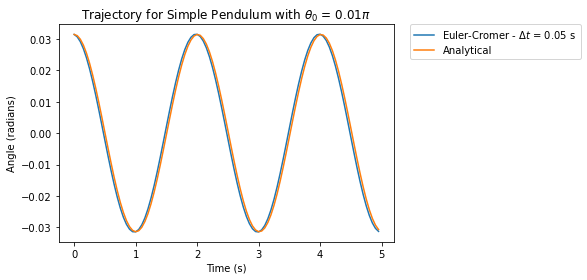

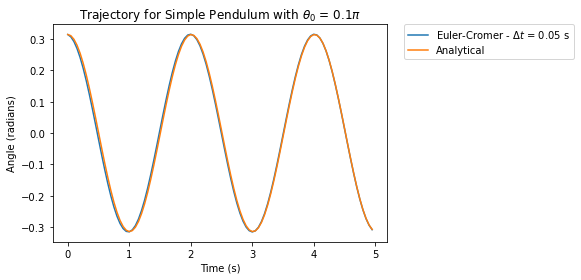

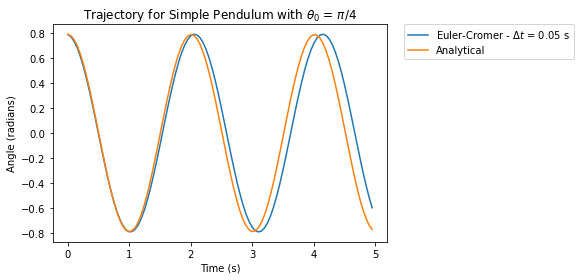

In [50]:
# Now Plot our results

fig, ax1 = plt.subplots()    #Create a new figure object and its associated axes
ax1.plot(t_euler_cromer1, theta_euler_cromer1, label=r'Euler-Cromer - $\Delta t$ = 0.05 s')
ax1.plot(t_euler_cromer1, theta_analytic1, label = 'Analytical')
ax1.set_xlabel('Time (s)')                        #Label the horizontal axis
ax1.set_ylabel('Angle (radians)')                      #Label the vertical axis
ax1.set_title(r"Trajectory for Simple Pendulum with $\theta_0$ = 0.01$\pi$")#Title the plot
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig, ax2 = plt.subplots()
ax2.plot(t_euler_cromer2, theta_euler_cromer2, label=r'Euler-Cromer - $\Delta t$ = 0.05 s')
ax2.plot(t_euler_cromer2, theta_analytic2, label = 'Analytical')
ax2.set_xlabel('Time (s)')                        #Label the horizontal axis
ax2.set_ylabel('Angle (radians)')                      #Label the vertical axis
ax2.set_title(r"Trajectory for Simple Pendulum with $\theta_0$ = 0.1$\pi$")#Title the plot 
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig, ax3 = plt.subplots()
ax3.plot(t_euler_cromer3, theta_euler_cromer3, label=r'Euler-Cromer - $\Delta t$ = 0.05 s')
ax3.plot(t_euler_cromer3, theta_analytic3, label = 'Analytical')
ax3.set_xlabel('Time (s)')                        #Label the horizontal axis
ax3.set_ylabel('Angle (radians)')                      #Label the vertical axis
ax3.set_title(r"Trajectory for Simple Pendulum with $\theta_0$ = $\pi$/4")#Title the plot 
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

As expected, for smaller angles, the harmonic approximation is a better approximation for the pendulum.

### ***Extension Problem 12***
Compute $\theta(t)$ for the simple pendulum with $\theta_0 = \{(0.1)\pi, \pi/4, \pi/2, (0.9)\pi\}$.

In [51]:
# Compute a pendulum trajectory using Analytical solution
# we define length of pendulum

LENGTH = 1.0      # [m]
pi = np.pi       # for ease of writing code

# Parameters

OMEGA_0 = omega_0_pend(LENGTH)     # angular frequncy [1/s]
THETA_0 = np.array([0.01 * pi, pi / 4, pi / 2, 0.9 * pi])         # initial angle [rad]
T_max = 5.0       # maximum time [s]
DT = 0.05         # Euler time step [s]

# Compute the Euler-Cromer soltution
(t_euler_cromer1, theta_euler_cromer1, omega_euler_cromer1) = PEND_Euler_Cromer( OMEGA_0, THETA_0[0], T_max, DT)
(t_euler_cromer2, theta_euler_cromer2, omega_euler_cromer2) = PEND_Euler_Cromer( OMEGA_0, THETA_0[1], T_max, DT)
(t_euler_cromer3, theta_euler_cromer3, omega_euler_cromer3) = PEND_Euler_Cromer( OMEGA_0, THETA_0[2], T_max, DT)
(t_euler_cromer4, theta_euler_cromer4, omega_euler_cromer4) = PEND_Euler_Cromer( OMEGA_0, THETA_0[3], T_max, DT)

# Compute the analyticial solution
t_analytic1 = np.copy(t_euler_cromer1)  
(theta_analytic1, ang_v1) = PEND_analytic( OMEGA_0, THETA_0[0], t_analytic1)
t_analytic2 = np.copy(t_euler_cromer2)  
(theta_analytic2, ang_v2) = PEND_analytic( OMEGA_0, THETA_0[1], t_analytic2)
t_analytic3 = np.copy(t_euler_cromer3)  
(theta_analytic3, ang_v3) = PEND_analytic( OMEGA_0, THETA_0[2], t_analytic3)
t_analytic4 = np.copy(t_euler_cromer4)  
(theta_analytic4, ang_v4) = PEND_analytic( OMEGA_0, THETA_0[3], t_analytic4)


In [52]:
# compute theta(t)/theta_0 for Euler_cromer solution
ratio1 = theta_euler_cromer1 / THETA_0[0]
ratio2 = theta_euler_cromer2 / THETA_0[1]
ratio3 = theta_euler_cromer3 / THETA_0[2]
ratio4 = theta_euler_cromer4 / THETA_0[3]

In [53]:
# compute theta(t)/theta_0 for analytic solution
ratio1_analytic = theta_analytic1 / THETA_0[0]
ratio2_analytic = theta_analytic2 / THETA_0[1]
ratio3_analytic = theta_analytic3 / THETA_0[2]
ratio4_analytic = theta_analytic4 / THETA_0[3]

# Results seemed odd, so I wanted to check here
print(ratio1_analytic[15])
print(ratio2_analytic[15])
print(ratio3_analytic[15])
print(ratio4_analytic[15])

-0.7011970269203519
-0.7011970269203519
-0.7011970269203519
-0.7011970269203519


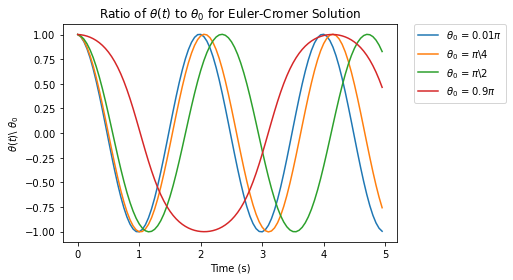

In [54]:
# Plot ratio as function of time for euler cromer solution

plt.plot(t_euler_cromer1, ratio1, label=r'$\theta_0$ = 0.01$\pi$')
plt.plot(t_euler_cromer2, ratio2, label=r'$\theta_0$ = $\pi$\4')
plt.plot(t_euler_cromer3, ratio3, label=r'$\theta_0$ = $\pi$\2')
plt.plot(t_euler_cromer4, ratio4, label=r'$\theta_0$ = 0.9$\pi$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$\theta(t)$\ $\theta_0$' )
plt.title( r'Ratio of $\theta(t)$ to $\theta_0$ for Euler-Cromer Solution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Here, we can see that as $\theta_0 \rightarrow \pi$,  the period of oscillation increases more.

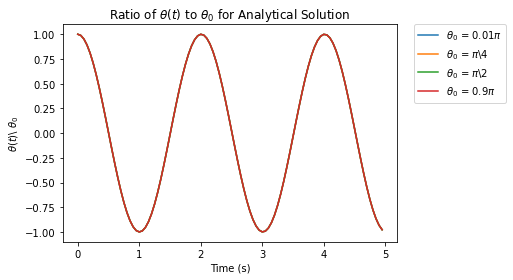

In [55]:
# Plot ratio as function of time for analytic solution

plt.plot(t_analytic1, ratio1_analytic, label=r'$\theta_0$ = 0.01$\pi$')
plt.plot(t_analytic2, ratio2_analytic, label=r'$\theta_0$ = $\pi$\4')
plt.plot(t_analytic3, ratio3_analytic, label=r'$\theta_0$ = $\pi$\2')
plt.plot(t_analytic4, ratio4_analytic, label=r'$\theta_0$ = 0.9$\pi$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$\theta(t)$\ $\theta_0$' )
plt.title( r'Ratio of $\theta(t)$ to $\theta_0$ for Analytical Solution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

My plot above seems odd. It seems that as $\theta_0 \rightarrow \pi$, the ratio $\theta(t)/\theta_0$ does not change. I'm so confused about why my plot here, for the analytical solution, is so different from my Euler-Cromer one. I used a harmonic approximation for the pendulum, but I'm confused about why this approximation does not seem to work, given that we're using fairly small angles.

### ***Extension Problem 13***
* Implement the Euler-Cromer method for the driven, damped simple pendulum. 

In [56]:
# Euler's algorithm applied to the simple pendulum
def PEND_Euler_Cromer_Driven_Damp( omega_0, theta_0, t_max, dt, beta, omega_d, f_0):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, theta, omega)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    theta0 - initial angle (radian) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    beta - damping rate (1/s)
    omega_d - frequency of driving
    f_0 - amplitude fo driving force
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the angle & velocity arrays
    t_arr = np.zeros(t_steps)
    theta_arr = np.zeros(t_steps)
    ang_speed_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    theta_arr[0] = theta_0    # Initial position
    ang_speed_arr[0] = 0.0   # Assume the pendulum is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        alpha = (-1.0) * ((omega_0 ** 2.0) * np.sin(theta_arr[i]) + 2 * beta * ang_speed_arr[i]) + f_0 * np.cos(omega_d * t_arr[i])
        ang_speed_arr[i + 1] = ang_speed_arr[i] + alpha * dt        # update the angular velocity
        theta_arr[i + 1] = theta_arr[i] + ang_speed_arr[i + 1] * dt  # update the position
    
    return (t_arr, theta_arr, ang_speed_arr)

* Compute the trajectories for $f_0 = \{ 0.7~\text{s}^{-1}, 1.1~\text{s}^{-1}\}$ with the other parameters fixed as follows:
$\quad\theta_0 = 1.0,~\text{rad} \quad \beta = 0.25,~\text{s}^{-1}, \quad \omega_0 = 1.0,~\text{s}^{-1},\quad \omega_d = 0.6,~\text{s}^{-1}$

In [57]:
# Compute a PENDULUM trajectory using Euler-Cromer's algorithm with damping and driving
# We define omega_0, x_0, mass, 

# Parameters
OMEGA_0 = 1.0           # angular frequncy [1/s]
THETA_0 = 1.0              # initial angle [rad]
BETA = 0.25                # [1/s]
OMEGA_D = 0.6              # [1/s]
DT = 0.05               # Euler time step [s]
T_max = 50.0
F_0 = np.array([0.7, 1.1])   # [1/s]
MASS = 5.0                   # [kg]

# Compute the Euler-Cromer soltution
(t_euler_cromer1, theta_euler_cromer1, omega_euler_cromer1) = PEND_Euler_Cromer_Driven_Damp( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[0])
(t_euler_cromer2, theta_euler_cromer2, omega_euler_cromer2) = PEND_Euler_Cromer_Driven_Damp( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[1])

 * Plot $\theta(t)$ and $d\theta/dt$ vs. t for both values of driving frequency. Discuss the difference in the behavior you see--are they both periodic motion?

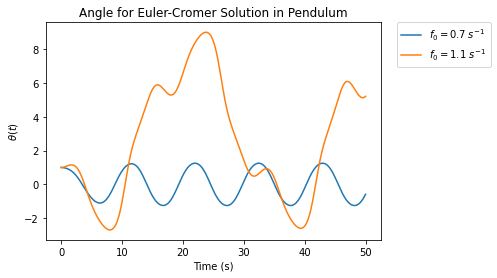

In [58]:
# Plot theta as function of time for pendulum

plt.plot(t_euler_cromer1, theta_euler_cromer1, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer2, theta_euler_cromer2, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$\theta(t)$' )
plt.title( r'Angle for Euler-Cromer Solution in Pendulum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Here we see that when $f_0$ > 1, the $\theta(t)$ is nonperiodic and has a strange pattern, while when $f_0$ = 0.7 s$^{-1}$, the plot is periodic with a consistent amplitude.

In [59]:
# For f_0 = 0.7
d_theta1 = []

# Find all values of d_theta and add to list
for i in range(len(theta_euler_cromer1) - 1):
    d_theta1.append(theta_euler_cromer1[i + 1] - theta_euler_cromer1[i])

# Get arrays ready to go
d_theta1_arr = np.array(d_theta1)    
t_euler_cromer_1 = np.delete(t_euler_cromer1, len(t_euler_cromer1) - 1)    #remove the last element


# For f_0 = 1.1
d_theta2 = []

for i in range(len(theta_euler_cromer2) - 1):
    d_theta2.append(theta_euler_cromer2[i + 1] - theta_euler_cromer2[i])

# Get arrays ready to go
d_theta2_arr = np.array(d_theta2)    
t_euler_cromer_2 = np.delete(t_euler_cromer2, len(t_euler_cromer2) - 1)

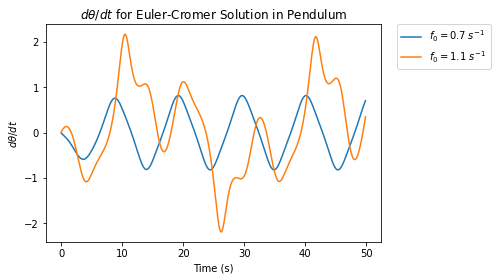

In [60]:
# Plot d_theta/dt as function of time for pendulum

plt.plot(t_euler_cromer_1, d_theta1_arr / DT, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer_2, d_theta2_arr / DT, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$d\theta /dt$' )
plt.title( r'$d\theta /dt$ for Euler-Cromer Solution in Pendulum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Here we see that for $f_0$ = 0.7 s$^{-1}$, $d\theta$/$dt$ for the pendulum is periodic. With $f_0$ = 1.1 s$^{-1}$, we see a strange, nonperiodic pattern.

* Plot the phase space trajectories for these two sets of conditions and describe the difference. Try a few more values of $f_0$ and discuss what you find!

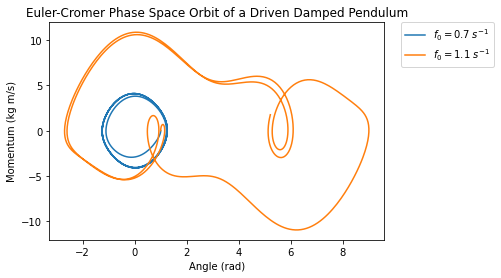

In [61]:
# Plot phase space orbits for driven damped Euler-cromer solution for different values of omega_d

# first calculate momentum
# I may have done this calculation wrong - I'm not certain
ang_momentum_euler_cromer1 = MASS * omega_euler_cromer1
ang_momentum_euler_cromer2 = MASS * omega_euler_cromer2

# Now plot
# Plot momentum vs position for Euler-cromer solution for different values of beta
plt.plot(theta_euler_cromer1, ang_momentum_euler_cromer1, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(theta_euler_cromer2, ang_momentum_euler_cromer2, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Angle (rad)' )
plt.ylabel(r'Momentum (kg m/s)' )
plt.title( 'Euler-Cromer Phase Space Orbit of a Driven Damped Pendulum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In the phase space orbit, the larger $f_0$ causes a larger range of angles and momentums that the pendulum can take on, but both trajectories in the phase space orbit seem fairly chaotic and unpredictable.

In [62]:
# Compute a PENDULUM trajectory using Euler-Cromer's algorithm with damping and driving
# We define omega_0, x_0, mass, 
# We'll try a few more values of f_0

# Parameters
OMEGA_0 = 1.0           # angular frequncy [1/s]
THETA_0 = 1.0              # initial angle [rad]
BETA = 0.25                # [1/s]
OMEGA_D = 0.6              # [1/s]
DT = 0.05               # Euler time step [s]
T_max = 50.0
F_0 = np.array([0.7, 1.1, 2.1, 4.1])   # [1/s]
MASS = 5.0                   # [kg]

# Compute the Euler-Cromer soltution
(t_euler_cromer1, theta_euler_cromer1, omega_euler_cromer1) = PEND_Euler_Cromer_Driven_Damp( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[0])
(t_euler_cromer2, theta_euler_cromer2, omega_euler_cromer2) = PEND_Euler_Cromer_Driven_Damp( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[1])
(t_euler_cromer3, theta_euler_cromer3, omega_euler_cromer3) = PEND_Euler_Cromer_Driven_Damp( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[2])
(t_euler_cromer4, theta_euler_cromer4, omega_euler_cromer4) = PEND_Euler_Cromer_Driven_Damp( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[3])

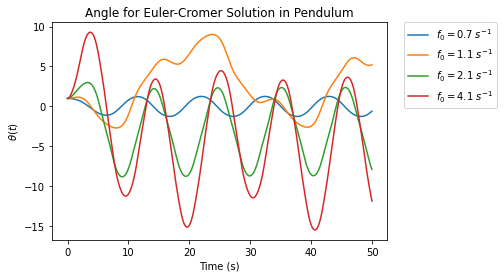

In [63]:
# Plot theta as function of time for pendulum

plt.plot(t_euler_cromer1, theta_euler_cromer1, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer2, theta_euler_cromer2, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.plot(t_euler_cromer3, theta_euler_cromer3, label=r'$f_0 = 2.1 ~{s}^{-1}$')
plt.plot(t_euler_cromer4, theta_euler_cromer4, label=r'$f_0 = 4.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$\theta(t)$' )
plt.title( r'Angle for Euler-Cromer Solution in Pendulum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In the above plot, we see the same trend we saw previously, with the larger $f_0$ values causing more chaotic patterns, andthe smaller ones seeming more predictable.

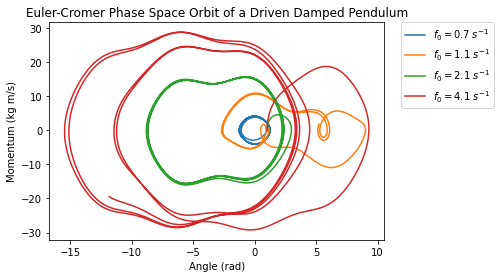

In [64]:
# Plot phase space orbits for driven damped Euler-cromer solution for different values of omega_d

# first calculate momentum
# I may have done this calculation wrong - I'm not certain
ang_momentum_euler_cromer1 = MASS * omega_euler_cromer1
ang_momentum_euler_cromer2 = MASS * omega_euler_cromer2
ang_momentum_euler_cromer3 = MASS * omega_euler_cromer3
ang_momentum_euler_cromer4 = MASS * omega_euler_cromer4

# Now plot
# Plot momentum vs position for Euler-cromer solution for different values of beta
plt.plot(theta_euler_cromer1, ang_momentum_euler_cromer1, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(theta_euler_cromer2, ang_momentum_euler_cromer2, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.plot(theta_euler_cromer3, ang_momentum_euler_cromer3, label=r'$f_0 = 2.1 ~{s}^{-1}$')
plt.plot(theta_euler_cromer4, ang_momentum_euler_cromer4, label=r'$f_0 = 4.1 ~{s}^{-1}$')
plt.xlabel('Angle (rad)' )
plt.ylabel(r'Momentum (kg m/s)' )
plt.title( 'Euler-Cromer Phase Space Orbit of a Driven Damped Pendulum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Wow! The above plot feels fairly chaotic! I'm really not sure how to interpret it.

### ***Extension Problem 12***
For the same set of parameters as above, starting the pendulum from the following 2 sets of intial conditions:
* Case a: $\quad \theta(t=0) = 0.0, \quad d \theta/dt |_{t=0} = 0.0$
* Case b: $\quad \theta(t=0) = 0.0, \quad d \theta/dt |_{t=0} = 0.01~s^{-1}$

In [65]:
# Euler's algorithm applied to the simple pendulum
def PEND_Euler_Cromer_Driven_Damp2( omega_0, theta_0, t_max, dt, beta, omega_d, f_0, ang_speed_0):
    '''
    Returns the numerical solution for the position and velocity 
    of a simple harmonic released from rest using the Euler algorithm.
    
    Returns: (t, theta, omega)

    Parameters:
    omega_0 - the natural frequency sqrt(k/m) (1/s) - float
    theta0 - initial angle (radian) - float
    t_max - the maximum time (s) - float
    dt - the time step for Euler (s) - float
    beta - damping rate (1/s)
    omega_d - frequency of driving
    f_0 - amplitude fo driving force
    '''
    
    # Compute the time steps needed
    t_steps = int(np.ceil(t_max/dt))

    # Create the angle & velocity arrays
    t_arr = np.zeros(t_steps)
    theta_arr = np.zeros(t_steps)
    ang_speed_arr = np.zeros(t_steps)

    # Initialize the arrays
    t_arr[0] = 0.0    # We'll start at t=0
    theta_arr[0] = theta_0    # Initial position
    ang_speed_arr[0] = ang_speed_0   # Assume the pendulum is released from rest
    
    # Main loop for the Euler algorithm
    for i in range(t_steps - 1):
        t_arr[i + 1] = t_arr[i ] + dt
        alpha = (-1.0) * ((omega_0 ** 2.0) * np.sin(theta_arr[i]) + 2 * beta * ang_speed_arr[i]) + f_0 * np.cos(omega_d * t_arr[i])
        ang_speed_arr[i + 1] = ang_speed_arr[i] + alpha * dt        # update the angular velocity
        theta_arr[i + 1] = theta_arr[i] + ang_speed_arr[i + 1] * dt  # update the position
    
    return (t_arr, theta_arr, ang_speed_arr)

In [66]:
# Compute a PENDULUM trajectory using Euler-Cromer's algorithm with damping and driving
# We define omega_0, x_0, mass, 

# Parameters
OMEGA_0 = 1.0           # angular frequncy [1/s]
THETA_0 = 0.0              # initial angle [rad]
BETA = 0.25                # [1/s]
OMEGA_D = 0.6              # [1/s]
DT = 0.05               # Euler time step [s]
T_max = 25.0
F_0 = np.array([0.7, 1.1])   # [1/s]
MASS = 5.0                   # [kg]
ANG_SPEED_0 = 0

# Compute the Euler-Cromer soltution
(t_euler_cromer1_rest, theta_euler_cromer1_rest, omega_euler_cromer1_rest) = PEND_Euler_Cromer_Driven_Damp2( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[0], ANG_SPEED_0)
(t_euler_cromer2_rest, theta_euler_cromer2_rest, omega_euler_cromer2_rest) = PEND_Euler_Cromer_Driven_Damp2( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[1], ANG_SPEED_0)


# Compute a PENDULUM trajectory using Euler-Cromer's algorithm with damping and driving
# We define omega_0, x_0, mass, 

# Parameters
OMEGA_0 = 1.0           # angular frequncy [1/s]
THETA_0 = 0.0              # initial angle [rad]
BETA = 0.25                # [1/s]
OMEGA_D = 0.6              # [1/s]
DT = 0.05               # Euler time step [s]
T_max = 25.0
F_0 = np.array([0.7, 1.1])   # [1/s]
MASS = 5.0                   # [kg]
ANG_SPEED_0m = 0.01

# Compute the Euler-Cromer soltution
(t_euler_cromer1_move, theta_euler_cromer1_move, omega_euler_cromer1_move) = PEND_Euler_Cromer_Driven_Damp2( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[0], ANG_SPEED_0m)
(t_euler_cromer2_move, theta_euler_cromer2_move, omega_euler_cromer2_move) = PEND_Euler_Cromer_Driven_Damp2( OMEGA_0, THETA_0, T_max, DT, BETA, OMEGA_D, F_0[1], ANG_SPEED_0m)

* Plot the trajectory for both intial conditions for both values of $f_0$ on separate plots.

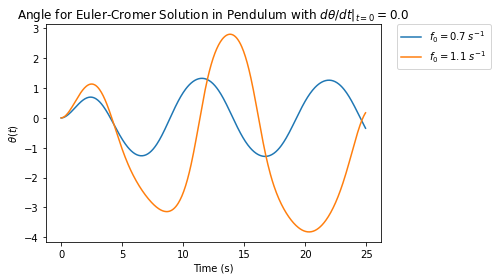

In [67]:
# Plot theta as function of time for pendulum

plt.plot(t_euler_cromer1_rest, theta_euler_cromer1_rest, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer2_rest, theta_euler_cromer2_rest, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$\theta(t)$' )
plt.title( r'Angle for Euler-Cromer Solution in Pendulum with $ d \theta/dt |_{t=0} = 0.0$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

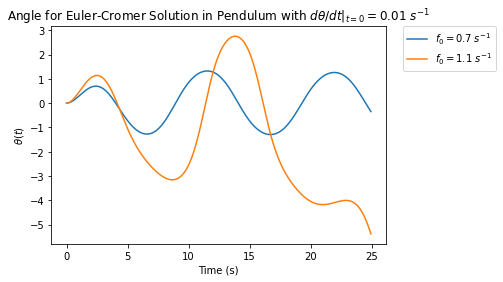

In [68]:
# Plot theta as function of time for pendulum

plt.plot(t_euler_cromer1_move, theta_euler_cromer1_move, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer2_move, theta_euler_cromer2_move, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$\theta(t)$' )
plt.title( r'Angle for Euler-Cromer Solution in Pendulum with $ d \theta/dt |_{t=0} = 0.01~s^{-1}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

* Plot the absolute value of the difference in the angular positions as a function of time $|\omega_a(t) - \omega_b(t)|$ for both values of $f_0$ on a log-linear plot. Describe the difference you see. *Hint*: You should see **chaotic** behavior!

In [69]:
# For f_0 = 0.7, start at rest
d_theta1_rest = []

# Find all values of d_theta and add to list
for i in range(len(theta_euler_cromer1_rest) - 1):
    d_theta1_rest.append(theta_euler_cromer1_rest[i + 1] - theta_euler_cromer1_rest[i])
    
# convert to array
d_theta1_rest_arr = np.array(d_theta1_rest)

# compute d_theta/dt
dtheta_dtrest1_arr = d_theta1_rest_arr / DT

# For f_0 = 0.7, start moving
d_theta1_move = []

# Find all values of d_theta and add to list
for i in range(len(theta_euler_cromer1_move) - 1):
    d_theta1_move.append(theta_euler_cromer1_move[i + 1] - theta_euler_cromer1_move[i])
    
# convert to array
d_theta1_move_arr = np.array(d_theta1_move)

# compute d_theta/dt
dtheta_dtmove1_arr = d_theta1_move_arr / DT

# Now compute |𝜔𝑎(𝑡)−𝜔𝑏(𝑡)| for f_0 = 0.7
abs_value1 = np.abs(dtheta_dtrest1_arr - dtheta_dtmove1_arr)

In [70]:
# For f_0 = 1.1, start at rest
d_theta2_rest = []

# Find all values of d_theta and add to list
for i in range(len(theta_euler_cromer2_rest) - 1):
    d_theta2_rest.append(theta_euler_cromer2_rest[i + 1] - theta_euler_cromer2_rest[i])
    
# convert to array
d_theta2_rest_arr = np.array(d_theta2_rest)

# compute d_theta/dt
dtheta_dtrest2_arr = d_theta2_rest_arr / DT

# For f_0 = 1.1, start moving
d_theta2_move = []

# Find all values of d_theta and add to list
for i in range(len(theta_euler_cromer2_move) - 1):
    d_theta2_move.append(theta_euler_cromer2_move[i + 1] - theta_euler_cromer2_move[i])
    
# convert to array
d_theta2_move_arr = np.array(d_theta2_move)

# compute d_theta/dt
dtheta_dtmove2_arr = d_theta2_move_arr / DT

# Now compute |𝜔𝑎(𝑡)−𝜔𝑏(𝑡)| for f_0 = 1.
abs_value2 = np.abs(dtheta_dtrest2_arr - dtheta_dtmove2_arr)

In [71]:
# Prepare time arrays for the plot

t_euler_cromer1_move_plot = t_euler_cromer1_move[:-1]
t_euler_cromer2_move_plot = t_euler_cromer2_move[:-1]

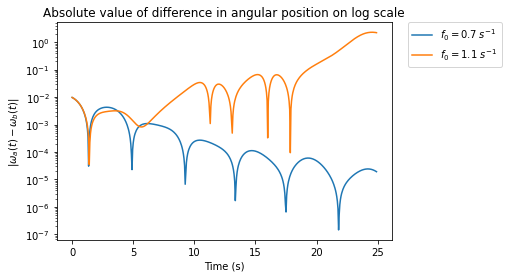

In [72]:
# Plot abs value of diff in ang velocity as function of time

plt.plot(t_euler_cromer1_move_plot, abs_value1, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer2_move_plot, abs_value2, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$|\omega_a(t) - \omega_b(t)|$' )
plt.title( r'Absolute value of difference in angular position on log scale')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.yscale('log')
plt.show()

I referred to this site for plotting help:
https://www.kite.com/python/answers/how-to-plot-on-a-log-scale-with-matplotlib-in-python

Wow! Although both values for $f_0$ begin by having $|\omega_a(t) - \omega_b(t)|$, they end up taking very different trajectories over time.

In [73]:
# I also tried to plot |𝜔𝑎(𝑡)−𝜔𝑏(𝑡)| form my Euler-Cromer simulations and see the results:

abs_1 = np.abs(omega_euler_cromer1_rest - omega_euler_cromer1_move)   # for f_0 = 0.7
abs_2 = np.abs(omega_euler_cromer2_rest - omega_euler_cromer2_move)   # for f_0 = 1.1

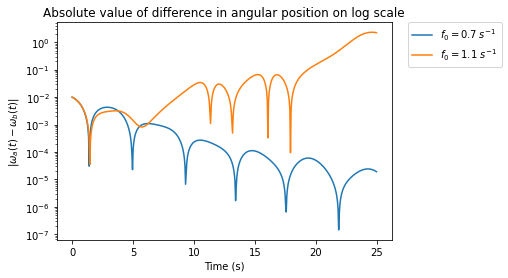

In [74]:
# Plot abs value of diff in ang velocity as function of time

plt.plot(t_euler_cromer1_move, abs_1, label=r'$f_0 = 0.7 ~{s}^{-1}$')
plt.plot(t_euler_cromer1_move, abs_2, label=r'$f_0 = 1.1 ~{s}^{-1}$')
plt.xlabel('Time (s)' )
plt.ylabel(r'$|\omega_a(t) - \omega_b(t)|$' )
plt.title( r'Absolute value of difference in angular position on log scale')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.yscale('log')
plt.show()

As we should expect, the plot looks the same as the one above for $d\theta/dt$.